In [243]:
# read in required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [244]:
import sys
sys.version

# print the version of the libraries
print(f'Pandas version: {pd.__version__}')
print(f'Numpy version: {np.__version__}')
print(f'Seaborn version: {sns.__version__}')

# print the version of the python
import sys
print(f'Python version: {sys.version}')


Pandas version: 1.5.3
Numpy version: 1.23.5
Seaborn version: 0.12.2
Python version: 3.8.16 (default, Mar  2 2023, 03:18:16) [MSC v.1916 64 bit (AMD64)]


In [245]:
# paths

spotify_path = r'data\raw\spotify-2023.csv' # data input
save_image_path = os.path.join(os.getcwd(), 'images') # image output

In [246]:
spotify = pd.read_csv(spotify_path, encoding='latin-1')
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [247]:
# verify is we have nulls in any of the features
spotify.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [248]:
# # Remove non-numeric characters
# spotify['streams'] = spotify['streams'].str.replace(r'\D', '')

# Convert to float
spotify['streams'] = pd.to_numeric(spotify['streams'], errors='coerce')

spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    object 
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    object 
 14  bpm                   953 non-null    int64  
 15  key                   8

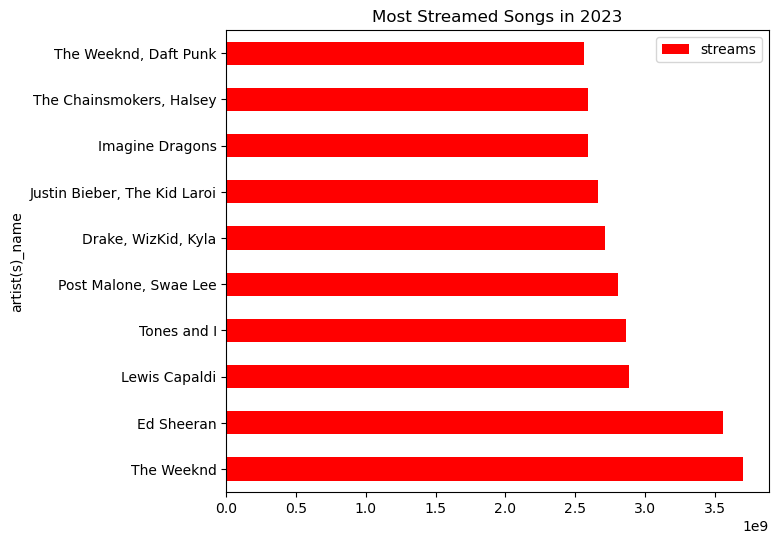

In [249]:
# what were the most streamed songs in 2023?
spotify.sort_values(by='streams', ascending=False).head(10).plot(kind='barh', 
                                                                 x='artist(s)_name', 
                                                                 y='streams', 
                                                                 title='Most Streamed Songs in 2023', 
                                                                 color='red', 
                                                                 figsize=(7, 6))
plt.savefig(os.path.join(save_image_path,'most_streamed_songs.png'))
plt.show()
plt.close()

In [250]:
import os

file_path = os.path.join(save_image_path,'most_streamed_songs.png')

# Check if the file is writable
if os.access(file_path, os.W_OK):
    print("File is writable")
else:
    print("File is not writable")

File is writable


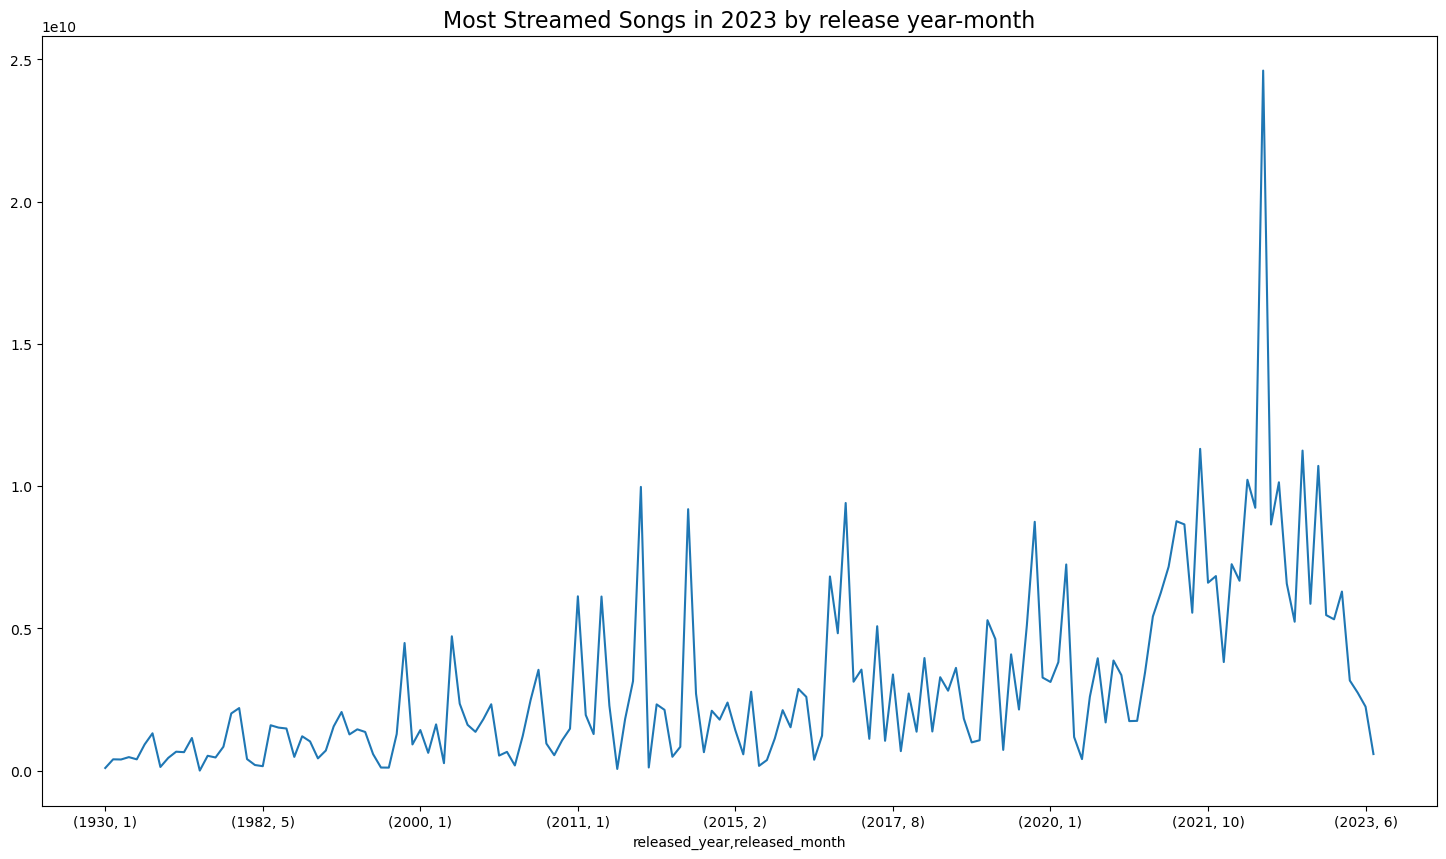

In [251]:
plt.figure(figsize=(18, 10))
plt.title('Most Streamed Songs in 2023 by release year-month', size= 16)
spotify.groupby(['released_year', 'released_month'])['streams'].sum().plot(kind='line', x='release_year_month', y='streams')

# save plot
plt.savefig(os.path.join(save_image_path, 'popularity_by_release_month.png'))
plt.show()
plt.close()

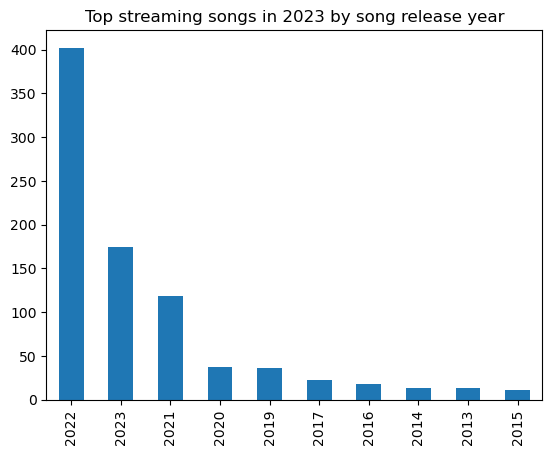

In [252]:
plt.title('Top streaming songs in 2023 by song release year')
spotify.released_year.value_counts().nlargest(10).plot(kind='bar')

plt.savefig(os.path.join(save_image_path, 'top_streaming_songs_by_release_year.png'))
plt.show()
plt.close()